In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Validando o tratamento feito anteriormente

In [2]:
df = pd.read_csv('../Dados/CHURN_CREDIT_MOD14_TRATADO.csv')
df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,10787603.0,0.0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,10787603.0,0.0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,10787603.0,0.0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,10787603.0,0.0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,10787603.0,0.0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,10787603.0,0.0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,10787603.0,1.0
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,10787603.0,0.0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,10787603.0,0.0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,10787603.0,0.0


In [3]:
df.dtypes

Credit_Score       int64
Pais                 str
Genero               str
Idade            float64
Tempo_Credito      int64
Balanco          float64
Qtd_Produtos       int64
Possui_Cartao    float64
Membro_Ativo     float64
Salario_Anual    float64
Churn            float64
dtype: object

In [4]:
df.isnull().sum()

Credit_Score     0
Pais             0
Genero           0
Idade            0
Tempo_Credito    0
Balanco          0
Qtd_Produtos     0
Possui_Cartao    0
Membro_Ativo     0
Salario_Anual    0
Churn            0
dtype: int64

# Iniciando a análise univariada

### Passo 01: Estatisticas Descritivas ---> Média, Mediana, Moda, Desvio Padrão, Mínimo, Máximo e Quartis

In [4]:
df.describe().round(2)

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
count,99708.00,99708.00,99708.00,99708.00,99708.00,99708.00,99708.0,99708.00,99708.00
mean,656.50,38.14,5.03,55594.90,1.55,0.76,0.5,10612292.65,0.21
std,80.28,8.82,2.81,62789.28,0.55,0.43,0.5,3350757.76,0.41
min,350.00,18.00,0.00,0.00,1.00,0.00,0.0,1158.00,0.00
25%,597.00,32.00,3.00,0.00,1.00,1.00,0.0,10787603.00,0.00
50%,659.00,37.00,5.00,0.00,2.00,1.00,0.0,10787603.00,0.00
75%,710.00,42.00,7.00,119859.54,2.00,1.00,1.0,10787603.00,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.0,38190168.00,1.00


### Passo 02: Se aprofundar em variáveis com comportamento estranho

#### Coluna Balanco

In [7]:
qtd_linhas_zeradas = (df['Balanco'] == 0).sum()
print(qtd_linhas_zeradas)

54033


In [10]:
percentual_zerado = ((df['Balanco'] == 0).mean() * 100).round(2)
print(f'{percentual_zerado}%')

54.19%


Vendo a distribuição dos dados...

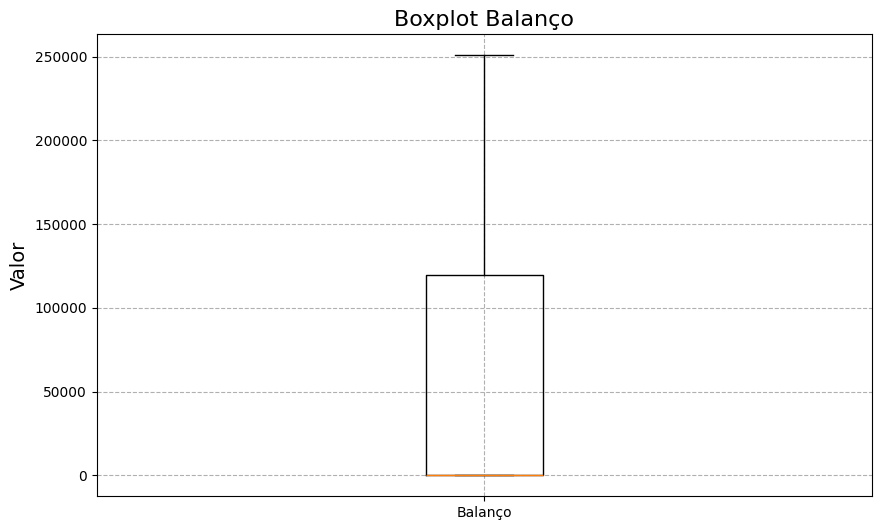

In [99]:
plt.figure(figsize = (10, 6))
plt.boxplot(df['Balanco'], tick_labels = ['Balanço'])
plt.title('Boxplot Balanço', fontsize = 16)
plt.ylabel('Valor', fontsize = 14)
plt.grid(True, linestyle = '--')

Retirando os valores zerados da categoria

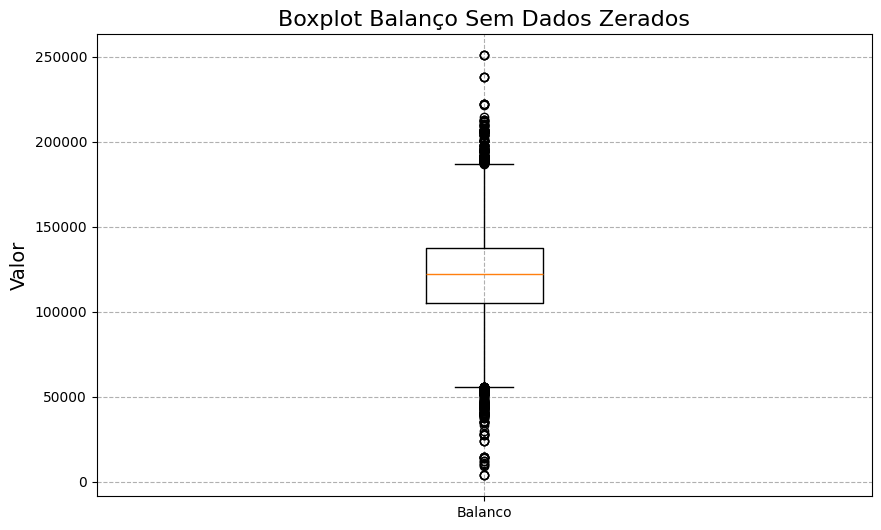

In [98]:
df_nao_zerado = df[df['Balanco'] != 0]
plt.style.use('default')

plt.figure(figsize = (10, 6))
plt.boxplot(df_nao_zerado['Balanco'], tick_labels = ['Balanco'])
plt.title('Boxplot Balanço Sem Dados Zerados', fontsize = 16)
plt.ylabel('Valor', fontsize = 14)
plt.grid(True, linestyle = '--')


#### Coluna Qtd_Produtos

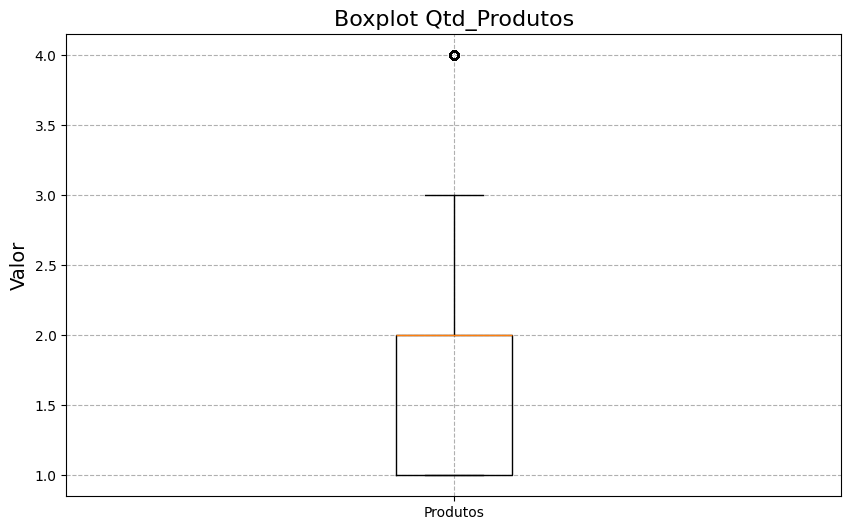

In [97]:
plt.figure(figsize = (10, 6))
plt.boxplot(df['Qtd_Produtos'], tick_labels = ['Produtos'])
plt.title('Boxplot Qtd_Produtos', fontsize = 16)
plt.ylabel('Valor', fontsize = 14)
plt.grid(True, linestyle = '--')


#### Coluna Tempo_Credito

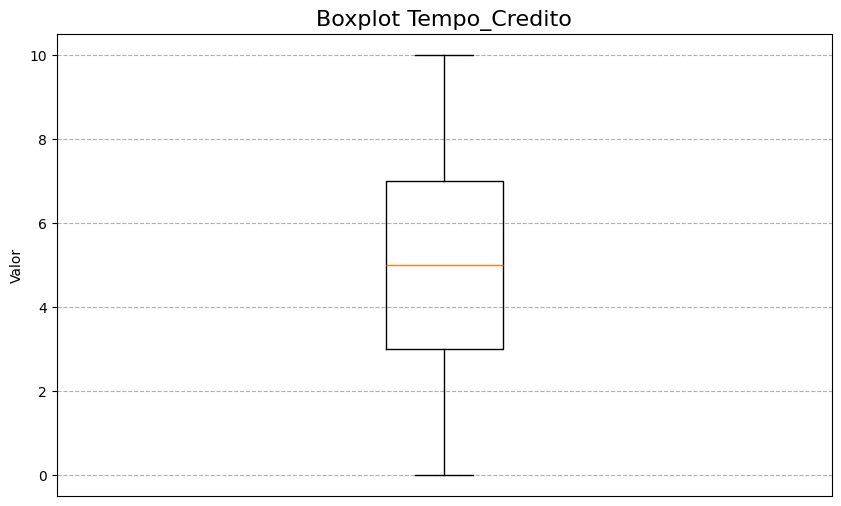

In [100]:
plt.figure(figsize = (10, 6))
plt.boxplot(df['Tempo_Credito'])
plt.title('Boxplot Tempo_Credito', fontsize = 16)
plt.xticks([])
plt.ylabel('Valor')
plt.grid(True, linestyle = '--')

### Passo 03: Analisar variáveis booleanas

#### Coluna Possui_Cartao

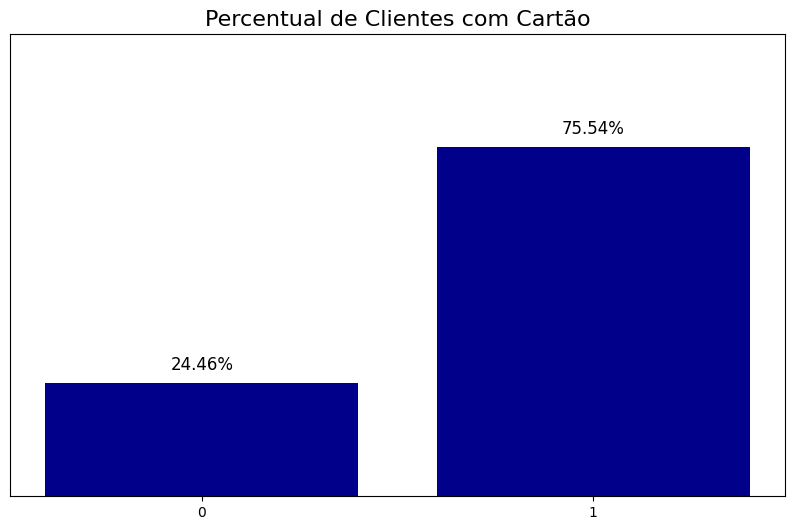

In [140]:
contagem_cartao = df['Possui_Cartao'].value_counts()
percentual_cartao = ((contagem_cartao / contagem_cartao.sum()) * 100).round(2) # ---> Tirando o percentual de cada valor

plt.figure(figsize = (10, 6))
plt.bar(percentual_cartao.index, percentual_cartao, color = 'darkblue')
plt.title('Percentual de Clientes com Cartão', fontsize = 16)
plt.xticks(range(0, 2, 1))
plt.yticks(range(0, 110, 10))
plt.yticks([])
for i, (x, y) in enumerate(zip(percentual_cartao.index, percentual_cartao)):
    plt.text(
        x,
        y + 2,
        f'{y}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )

plt.show()

In [136]:
# Calculando valores brutos
df['Possui_Cartao'].value_counts()

Possui_Cartao
1.0    75320
0.0    24388
Name: count, dtype: int64

#### Coluna Membro_Ativo

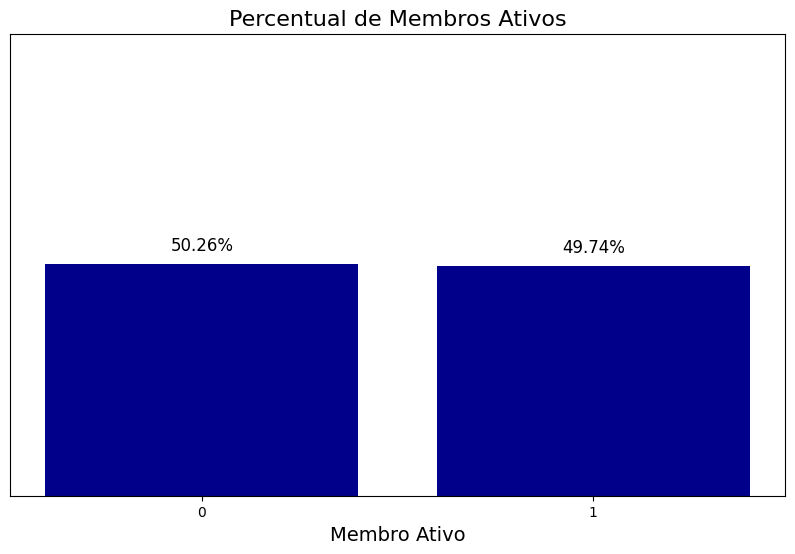

In [155]:
contagem_membros = df['Membro_Ativo'].value_counts()
percentual_membros = ((contagem_membros / contagem_membros.sum()) * 100).round(2)

plt.figure(figsize = (10, 6))
plt.bar(percentual_membros.index, percentual_membros, color = 'darkblue')
plt.title('Percentual de Membros Ativos', fontsize = 16)
plt.xticks(range(0, 2, 1))
plt.xlabel('Membro Ativo', fontsize = 14)
plt.yticks(range(0, 110, 10))
plt.yticks([])
for i, (x, y) in enumerate(zip(percentual_membros.index, percentual_membros)):
    plt.text(
        x,
        y + 2,
        f'{y}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )

plt.show()


In [156]:
df['Membro_Ativo'].value_counts()

Membro_Ativo
0.0    50111
1.0    49597
Name: count, dtype: int64

#### Coluna Churn

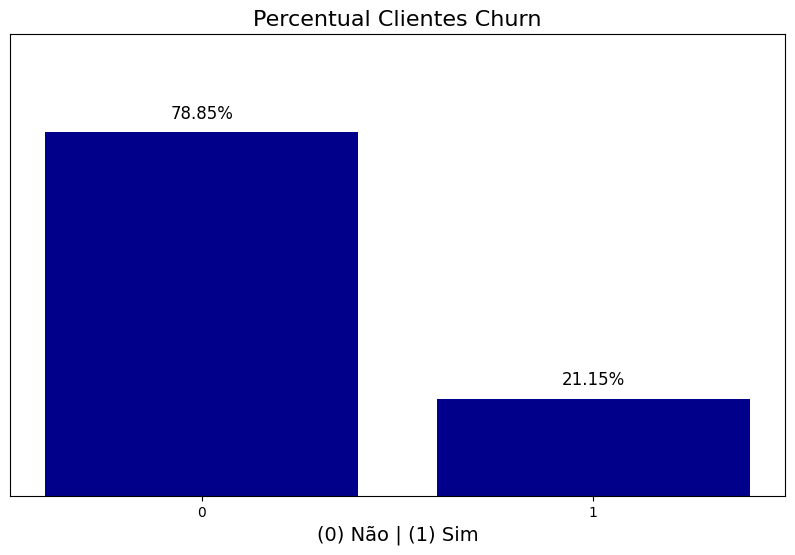

In [164]:
contagem_clientes_churn = df['Churn'].value_counts()
percentual_churn = ((contagem_clientes_churn / contagem_clientes_churn.sum()) * 100).round(2)

plt.figure(figsize = (10, 6))
plt.bar(percentual_churn.index, percentual_churn, color = 'darkblue')
plt.title('Percentual Clientes Churn', fontsize = 16)
plt.xticks(range(0, 2, 1))
plt.xlabel('(0) Não | (1) Sim', fontsize = 14)
plt.yticks(range(0, 110, 10))
plt.yticks([])
for i, (x, y) in enumerate(zip(percentual_churn.index, percentual_churn)):
    plt.text(
        x,
        y + 2,
        f'{y}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )
plt.show()

In [3]:
df['Churn'].value_counts()

Churn
0.0    78624
1.0    21084
Name: count, dtype: int64

#### Coluna Pais

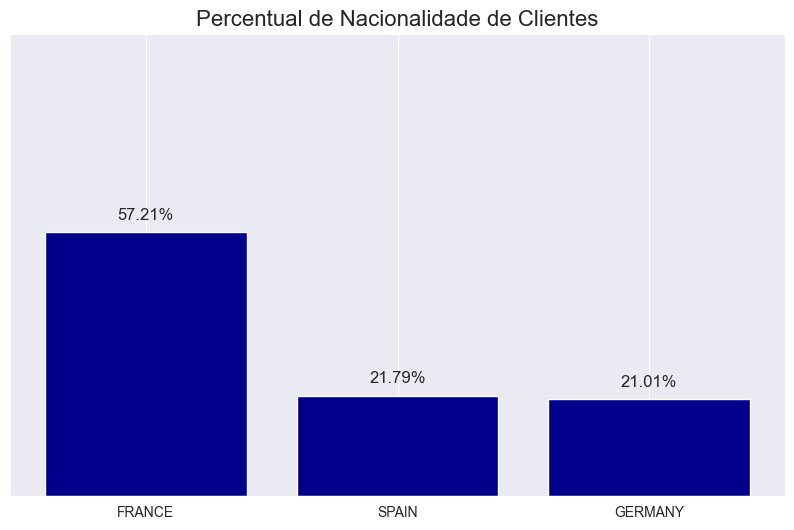

Pais
FRANCE     57039
SPAIN      21723
GERMANY    20946
Name: count, dtype: int64


In [116]:
contagem_pais = df['Pais'].value_counts()
percentual_pais = ((contagem_pais / contagem_pais.sum()) * 100)

plt.figure(figsize = (10, 6))
plt.bar(percentual_pais.index, percentual_pais, color = 'darkblue')
plt.title('Percentual de Nacionalidade de Clientes', fontsize = 16)
plt.yticks(range(0, 110, 10))
plt.yticks([])
for i, (x, y) in enumerate(zip(percentual_pais.index, percentual_pais)):
    plt.text(
        x,
        y + 2,
        f'{y:.2f}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )
plt.show()

print(contagem_pais)

#### Coluna de Gênero

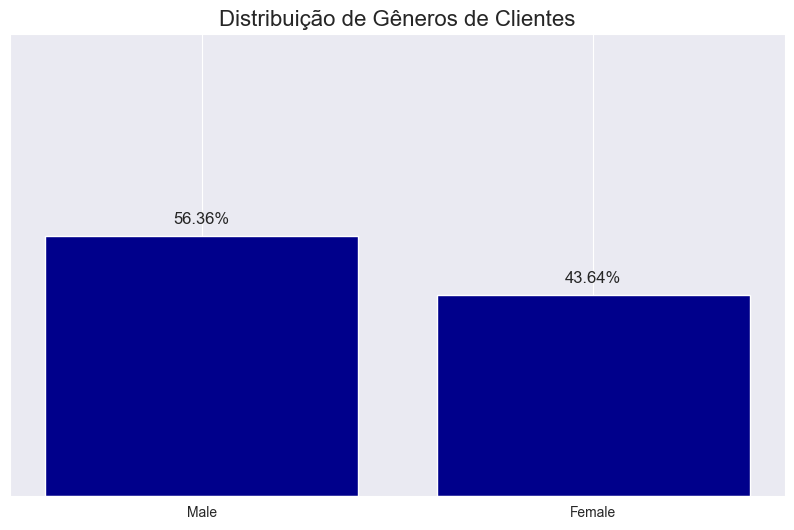

Genero
Male      56199
Female    43509
Name: count, dtype: int64


In [115]:
contagem_genero = df['Genero'].value_counts()
percentual_generos = ((contagem_genero / contagem_genero.sum()) * 100)

plt.figure(figsize = (10, 6))
plt.bar(percentual_generos.index, percentual_generos, color = 'darkblue')
plt.title('Distribuição de Gêneros de Clientes', fontsize = 16)
plt.yticks(range(0, 110, 10))
plt.yticks([])
for i, (x, y) in enumerate(zip(percentual_generos.index, percentual_generos)):
    plt.text(
        x,
        y + 2,
        f'{y:.2f}%',
        ha = 'center',
        va = 'bottom',
        fontsize = 12
    )
plt.show()

print(contagem_genero)